# Lecture 8: The shooting method for BVP's

**Overview:**
* Root finding and boundary value problems.

**Next Lecture:**
* Shoot and Matching, 1D Schrodinger eqn.

---

### Tasks
- Does the solution for the launch angle depend on the initial bracketing window for your search?
- Can you extend this code to handle the case with air resistance? 
- Does the addition of air resistance result in any other complications for the root finder?

In [1]:
%matplotlib notebook
import numpy as np, matplotlib.pyplot as plt
from numpy import pi
import Particle3D as pt


In [64]:
def bisect(f, bracket, target, v, Cd, tol = 1.e-6):
    """ find the root of a function f using bisection
    a and b are low and high bracket limits
    v is a velocity
    Cd is a drag coefficent """
    a = bracket[0]
    b = bracket[1]
    
    fa = f(a,target, v, Cd)
    fb = f(b,target, v, Cd)
    gap  = abs(a - b)
   
    if fa == None :
        return 
    if fb == None :
        return
    
    if (fa*fb > 0.0):
        print('Bisection error: no root bracketed')
        return None
    elif fa == 0.0: return a
    elif fb == 0.0: return b

    while(True):
        xmid = 0.5*(a+b)
        fmid = f(xmid, target, v, Cd)

        if (fa*fmid > 0.0):
            a, fa = xmid, fmid
        else :b = xmid

        if (fmid == 0.0 or abs (b-a) < tol*gap): break

    return xmid

# the root of ft give the total time to reach target
def ft(t,target, V,Cd):
    # when air resistance is included you must define another function 
    # to find tfo
    
    p = pt.Projectile(tf = t,z0 = 0, u0 = V[0], v0 = V[1], w0 = V[2], Cd = Cd) 
    for ii in range(p.npoints):
        p.RK4_step()

    return p.x[1] - target[0]

# the root of fy is our solution
def fy(theta, target, v0, Cd):
    # only working in two dimensions (y,z) for now,.
    V = [0, v0*np.cos(theta), v0*np.sin(theta)]
    
    # if there is no drag, tf is easy to calculate analytically
    # with drag we must integrate and use a root finder to locate tf
    
    
    t = (target[0]/V[1])
    t_bracket = [0, t+1]
    tf = bisect(ft, t_bracket , target, V, Cd)
    print(tf)

    # check if we can make the range
    if tf == None:
        print('Initial velocity will not cover range')
        return None
    
    nsteps = 100
    dt = tf/nsteps
    p = pt.Projectile(tf = tf, z0 = 0, v0 = V[0], u0 = V[1], w0 = V[2], dt = dt, Cd = Cd) 
    for ii in range(nsteps):
        p.RK4_step()
    
    print("y(tf) = ", p.x[2])
    return p.x[2] - target[1] 
    

* Change parameters and find launch angle below

0.4090010781746921
y(tf) =  0.12877764972640104
1.5730010267488246
y(tf) =  149.41448987385374
0.521000214994105
y(tf) =  48.64908504446037
0.4340008917909762
y(tf) =  22.536314535832563
0.41499886536979963
y(tf) =  11.128173413257382
0.4110008354140132
y(tf) =  5.622628488892405
0.4100011013515018
y(tf) =  2.887991089718031
0.40899924623017947
y(tf) =  1.5221023428114608
0.408999454111081
y(tf) =  0.8400777165688775
0.4090006933487118
y(tf) =  0.4935384164573972
0.4090006905804511
y(tf) =  0.3146759148393132
0.40899962758187225
y(tf) =  0.2228276816346869
0.4090001468819192
y(tf) =  0.26899425951833356
0.40900041568132717
y(tf) =  0.29189176535471567
0.4090005523684186
y(tf) =  0.30329932921478275
0.409000483834256
y(tf) =  0.2975984545787957
0.4090005180536831
y(tf) =  0.30044889229840904
0.409000500932056
y(tf) =  0.2990236735389076
0.40900050948989114
y(tf) =  0.2997362829437471
0.4090005137710425
y(tf) =  0.30009258762735197
0.4090005116302806
y(tf) =  0.29991443528711803
0.409000

<IPython.core.display.Javascript object>


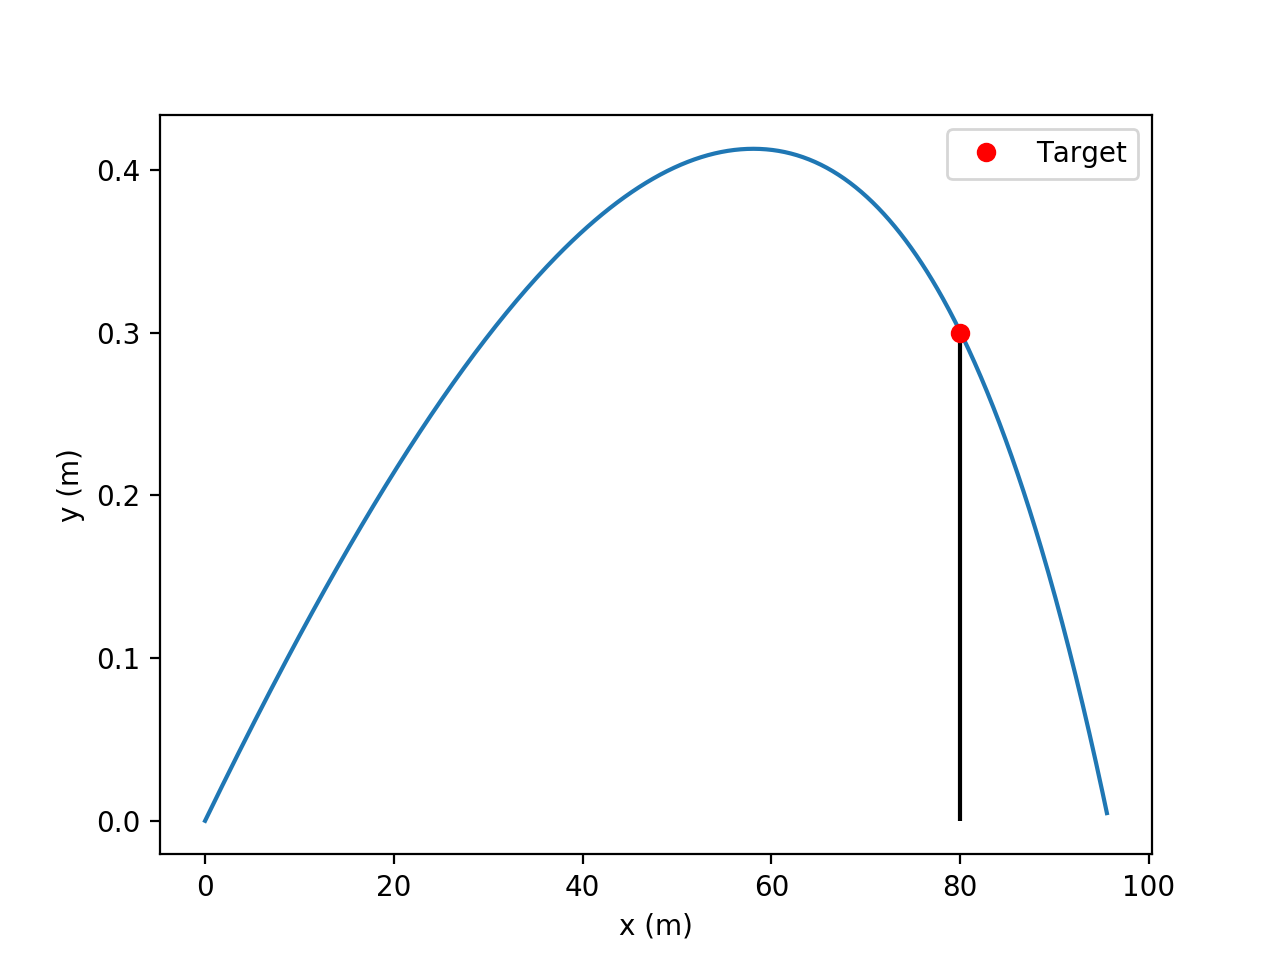

In [68]:
v0 = 300 #initial launch speed
xb = 80 # x coordinate of target
yb = 0.3 # y coordinate of target
Cd = 0.01 # drag coefficient, you must edit ft and fy above to work for non-zero Cd

theta_bracket = [0.01,1.1] # in radians

# find the launch angle
# it would be more efficient to first check if we bracket the root before trying a full
# bisection search
theta = bisect(fy, theta_bracket, [xb, yb], v0, Cd)

# only make a plot if we can hit our target
if (theta != None):
    print("theta = ", theta*180/pi)
    # max time for plotting purposes
    t_max = xb/(v0*np.cos(theta))

    fig = plt.figure()
    ax = fig.add_subplot(111)
    
    # plot the trajectory
    V = [0, v0*np.cos(theta), v0*np.sin(theta)]
    p = pt.Projectile(tf = t_max*2,  z0 = 0, u0 = V[0], v0 = V[1], w0 = V[2], dt = 0.001, Cd = Cd) 
    p.scipy_trajectory()
    ax.plot(p.xv[:,1], p.xv[:,2])

    # plot the target position
    ax.vlines(xb, 0 , yb)
    ax.plot(xb, yb, marker ='o', ls = 'None', color = 'r', label = 'Target')
    
    
    ax.set_xlabel('x (m)')
    ax.set_ylabel('y (m)')
    ax.legend()
    plt.show()